# 1-8. 프로젝트 : 나랑 닮은 연예인을 찾아보자

주요 라이브러리 import하기

In [31]:
import face_recognition
import numpy as np
import PIL
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img

print(face_recognition.__version__)
print(numpy.__version__)
print(PIL.__version__)

1.2.3
1.22.2
8.3.2


## Step1. 사진 모으기

* 내 사진을 2장 이상 포함하기

file_list: ['남궁민.jpg', '원빈.jpg', '산다라박.jpg', '박성웅.jpg', '이선균.jpg', '신종우2.jpg', '공승연.jpg', '마동석.jpg', '이제훈.jpg', '이하늬.jpg', '유해진.jpg', '차태현.jpg', '최민식.jpg', '강태오.jpg', '정준호.jpg', '지진희.jpg', '김남길.jpg', '배용준.jpg', '한예슬.jpg', '유연석.jpg', '차승원.jpg', '조정석.jpg', '신종우.jpg', '심형탁.jpg', '진.jpg', '박해일.jpg', '김상중.jpg', '박시연.jpg', '이상윤.jpg', '이지훈.jpg']


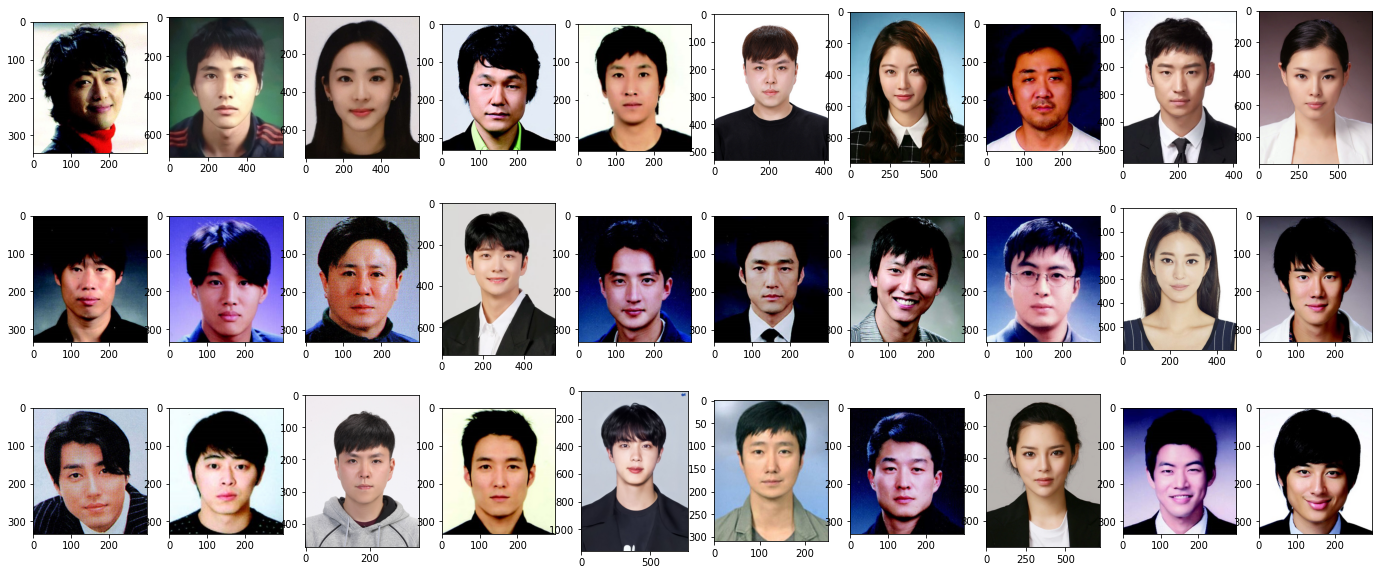

In [9]:
dir_path = os.getenv('HOME')+'/aiffel/celebrities_look_like_me/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))


fig, axes = plt.subplots(nrows = 3, ncols = 10, figsize = (24, 10))

for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path+'/' + file_list[i])
    ax.imshow(image)
plt.show()

fig.tight_layout()

## Step2. 얼굴 영역 자르기

In [14]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b, :]
    
    return cropped_face

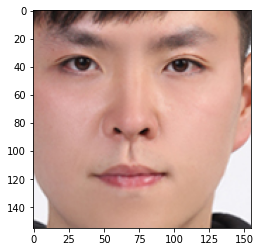

In [17]:
image_path = os.getenv('HOME') + '/aiffel/celebrities_look_like_me/images/신종우.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

잘린 결과물을 보니 노드에 나와있는 결과물과 다소 다른 모습을 볼 수 있었다. 왼쪽 귀와 턱이 잘려나간 모습을 볼 수 있었다...

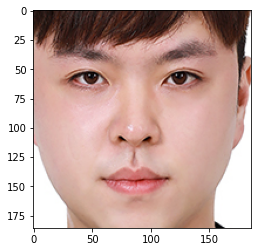

In [18]:
image_path = os.getenv('HOME') + '/aiffel/celebrities_look_like_me/images/신종우2.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

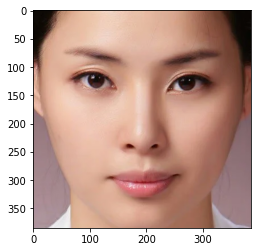

In [19]:
image_path = os.getenv('HOME') + '/aiffel/celebrities_look_like_me/images/이하늬.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

재미로 여자 연예인들 사진도 집어넣어보았다.. ㅎㅎ

In [39]:
# from PIL import Image
# face = get_cropped_face(image_path)
# pillow_image = Image.fromarray(face)
# pillow_image.save(path_to_save)

## Step3. 얼굴 영역의 임베딩 추출하기

In [23]:
dir_path = os.getenv('HOME')+'/aiffel/celebrities_look_like_me/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['남궁민.jpg', '원빈.jpg', '산다라박.jpg', '박성웅.jpg', '이선균.jpg', '신종우2.jpg', '공승연.jpg', '마동석.jpg', '이제훈.jpg', '이하늬.jpg', '유해진.jpg', '차태현.jpg', '최민식.jpg', '강태오.jpg', '정준호.jpg', '지진희.jpg', '김남길.jpg', '배용준.jpg', '한예슬.jpg', '유연석.jpg', '차승원.jpg', '조정석.jpg', '신종우.jpg', '심형탁.jpg', '진.jpg', '박해일.jpg', '김상중.jpg', '박시연.jpg', '이상윤.jpg', '이지훈.jpg']


In [27]:
image_file = os.path.join(dir_path, '신종우.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.12363145,  0.12572694, -0.01604244, -0.01258311, -0.11046581,
         0.01416942, -0.01107186, -0.13411036,  0.1414056 , -0.17145902,
         0.21743689, -0.10644407, -0.31664947, -0.03267322, -0.06383897,
         0.20376204, -0.17478359, -0.16484959, -0.02236294,  0.03045585,
         0.15517415,  0.01226667, -0.03791592,  0.04234795, -0.09523947,
        -0.27209976, -0.09030747, -0.04567401, -0.01932968, -0.07689712,
        -0.04719893,  0.01474239, -0.20056809, -0.03533512,  0.02401501,
         0.10434178, -0.020098  , -0.0720234 ,  0.18328063, -0.0020077 ,
        -0.20358491,  0.02772006,  0.07935707,  0.25143334,  0.11308262,
         0.04187771, -0.0240532 , -0.16412263,  0.08896615, -0.18225169,
         0.00221164,  0.14149044,  0.12004278,  0.0825967 ,  0.00942277,
        -0.19151084,  0.05025735,  0.06046357, -0.12745704,  0.02720384,
         0.12261421, -0.05761798, -0.0114504 , -0.09171111,  0.2513276 ,
         0.02562888, -0.10645027, -0.20702934,  0.1

In [28]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        # [[YOUR CODE]]
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
    
    return embedding_dict

In [29]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['신종우']

array([-0.12363145,  0.12572694, -0.01604244, -0.01258311, -0.11046581,
        0.01416942, -0.01107186, -0.13411036,  0.1414056 , -0.17145902,
        0.21743689, -0.10644407, -0.31664947, -0.03267322, -0.06383897,
        0.20376204, -0.17478359, -0.16484959, -0.02236294,  0.03045585,
        0.15517415,  0.01226667, -0.03791592,  0.04234795, -0.09523947,
       -0.27209976, -0.09030747, -0.04567401, -0.01932968, -0.07689712,
       -0.04719893,  0.01474239, -0.20056809, -0.03533512,  0.02401501,
        0.10434178, -0.020098  , -0.0720234 ,  0.18328063, -0.0020077 ,
       -0.20358491,  0.02772006,  0.07935707,  0.25143334,  0.11308262,
        0.04187771, -0.0240532 , -0.16412263,  0.08896615, -0.18225169,
        0.00221164,  0.14149044,  0.12004278,  0.0825967 ,  0.00942277,
       -0.19151084,  0.05025735,  0.06046357, -0.12745704,  0.02720384,
        0.12261421, -0.05761798, -0.0114504 , -0.09171111,  0.2513276 ,
        0.02562888, -0.10645027, -0.20702934,  0.13151234, -0.16

In [30]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['신종우']

array([-0.12363145,  0.12572694, -0.01604244, -0.01258311, -0.11046581,
        0.01416942, -0.01107186, -0.13411036,  0.1414056 , -0.17145902,
        0.21743689, -0.10644407, -0.31664947, -0.03267322, -0.06383897,
        0.20376204, -0.17478359, -0.16484959, -0.02236294,  0.03045585,
        0.15517415,  0.01226667, -0.03791592,  0.04234795, -0.09523947,
       -0.27209976, -0.09030747, -0.04567401, -0.01932968, -0.07689712,
       -0.04719893,  0.01474239, -0.20056809, -0.03533512,  0.02401501,
        0.10434178, -0.020098  , -0.0720234 ,  0.18328063, -0.0020077 ,
       -0.20358491,  0.02772006,  0.07935707,  0.25143334,  0.11308262,
        0.04187771, -0.0240532 , -0.16412263,  0.08896615, -0.18225169,
        0.00221164,  0.14149044,  0.12004278,  0.0825967 ,  0.00942277,
       -0.19151084,  0.05025735,  0.06046357, -0.12745704,  0.02720384,
        0.12261421, -0.05761798, -0.0114504 , -0.09171111,  0.2513276 ,
        0.02562888, -0.10645027, -0.20702934,  0.13151234, -0.16

* 내 사진들끼리의 얼굴 임베딩 벡터 거리

In [32]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('신종우', '신종우2')

0.27221717113558036

내사진들끼리의 얼굴 임베딩 거리의 숫자가 작은것으로 보아 그래도 컴퓨터는 닮은 사람으로 보아주는 것을 확인하였다.

## Step4. 모은 연예인들과 비교하기

In [33]:
def get_nearest_face(name, top=5): 
    pass
get_nearest_face('신종우')

In [34]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('신종우')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [35]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('신종우',
  array([-0.12363145,  0.12572694, -0.01604244, -0.01258311, -0.11046581,
          0.01416942, -0.01107186, -0.13411036,  0.1414056 , -0.17145902,
          0.21743689, -0.10644407, -0.31664947, -0.03267322, -0.06383897,
          0.20376204, -0.17478359, -0.16484959, -0.02236294,  0.03045585,
          0.15517415,  0.01226667, -0.03791592,  0.04234795, -0.09523947,
         -0.27209976, -0.09030747, -0.04567401, -0.01932968, -0.07689712,
         -0.04719893,  0.01474239, -0.20056809, -0.03533512,  0.02401501,
          0.10434178, -0.020098  , -0.0720234 ,  0.18328063, -0.0020077 ,
         -0.20358491,  0.02772006,  0.07935707,  0.25143334,  0.11308262,
          0.04187771, -0.0240532 , -0.16412263,  0.08896615, -0.18225169,
          0.00221164,  0.14149044,  0.12004278,  0.0825967 ,  0.00942277,
         -0.19151084,  0.05025735,  0.06046357, -0.12745704,  0.02720384,
          0.12261421, -0.05761798, -0.0114504 , -0.09171111,  0.2513276 ,
          0.02562888, -0.1064

In [45]:
def get_nearest_face(name, top=5):
    # [[YOUR CODE]]
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [46]:
# 신종우와 가장 닮은 사람은 누굴까요?
get_nearest_face('신종우')

순위 1 : 이름(신종우2), 거리(0.27221717113558036)
순위 2 : 이름(이선균), 거리(0.41868591634193636)
순위 3 : 이름(강태오), 거리(0.43840080882569543)
순위 4 : 이름(심형탁), 거리(0.45357825395686485)
순위 5 : 이름(이하늬), 거리(0.47445024441175354)


나의 다른 사진과의 수치를 기준삼아 다른 연예인 증명사진과 가장 흡사하게..? 나온 순위를 확인하였다.

In [47]:
# 신종우2와 가장 닮은 사람은 누굴까요?
get_nearest_face('신종우2')

순위 1 : 이름(신종우), 거리(0.27221717113558036)
순위 2 : 이름(강태오), 거리(0.429090454982254)
순위 3 : 이름(조정석), 거리(0.47210872342922644)
순위 4 : 이름(이선균), 거리(0.4836672584468092)
순위 5 : 이름(배용준), 거리(0.49216630520693333)


## Step5. 다양한 재미있는 시각화 시도해 보기

In [16]:
from tkinter import *

In [19]:
import tkinter as tk

window = tk.Tk()
window.mainloop()

TclError: no display name and no $DISPLAY environment variable

In [18]:
tkinter.Tk()

TclError: no display name and no $DISPLAY environment variable

tkinter를 시도해보았으나 설치부분에서 오류가 발생하였다. 클라우드상에서는 사용이 안되도록 설정되어있나보다..